# **LAB 01**

## **Import libraries**

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

## **Import dataset**

In [147]:
df = pd.read_csv('DryBeanDataset/Dry_Bean_Dataset.csv')

In [148]:
df.head()
df.shape

(13611, 17)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Area - Diện tích của hạt đậu và số lượng pixel trong ranh giới hình ảnh của nó  
Perimeter - Chu vi của hạt đậu, được tính toán bằng cách đo chiều dài của đường viền hạt đậu  
MajorAxisLength - Khoảng cách giữa 2 đường dài nhất có thể vẽ được từ hạt đậu  
MinorAxisLength - Đường dài nhất của hạt đậu khi vuông góc với trục chính  
AspectRation - Xác định mối quan hệ giữa MajorAxisLength và MinorAxisLength  
Eccentricity - Độ lệch tâm của hình elip có cùng mômen với vùng  
ConvexArea - Số pixel trong một đa giác lồi nhỏ nhất có thể  chứa trong diện tích hạt đậu  
EquivDiameter - Đường kính tương đương: Đường kính hình tròn có diện tích bằng diện tích hạt đậu  
Extent - Tỉ lệ pixel trong vùng giới hạn của hạt đậu  
Solidity - Độ rắn chắc, hay còn được gọi là độ lồi. Là tỉ lệ của các pixel trong một đa giác lồi của hạt đậu  
roundness - Độ tròn. Được tính theo công thức: (4piA)/(P^2)  
Compactness - Đo độ tròn của hạt đậu  
ShapeFactor1  
ShapeFactor2  
ShapeFactor3  
ShapeFactor4  
Class - Loại đậu (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)  

In [150]:
# Checking null values
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [151]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [152]:
df.drop_duplicates(inplace=True)

In [153]:
df.Class.value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='Count'>

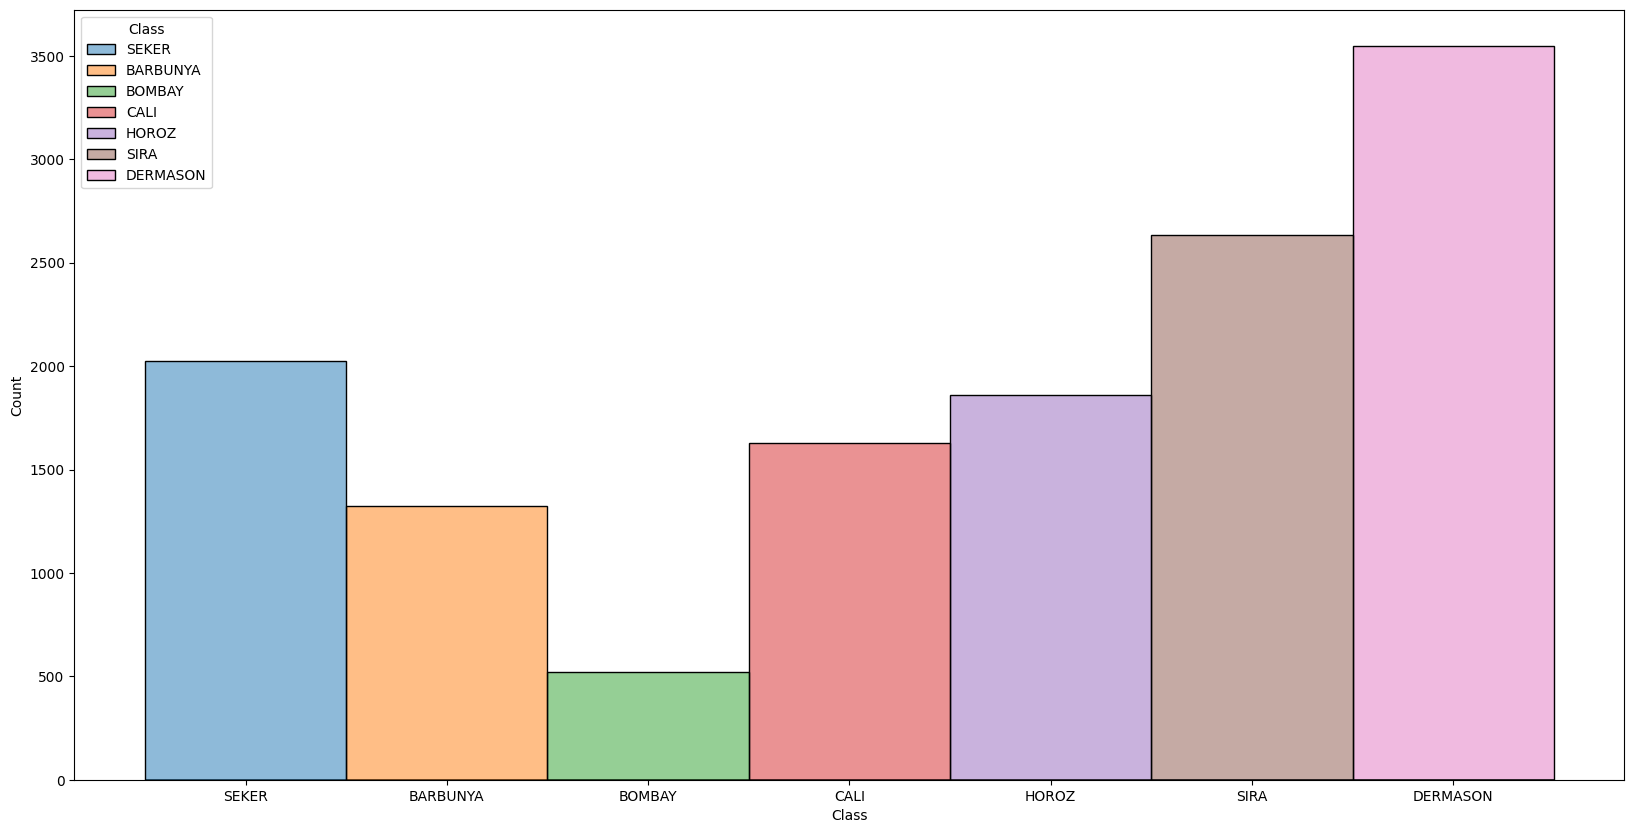

In [154]:
fig, ax = plt.subplots(figsize=(20,10))

sns.histplot(df, x='Class', ax=ax, hue='Class')

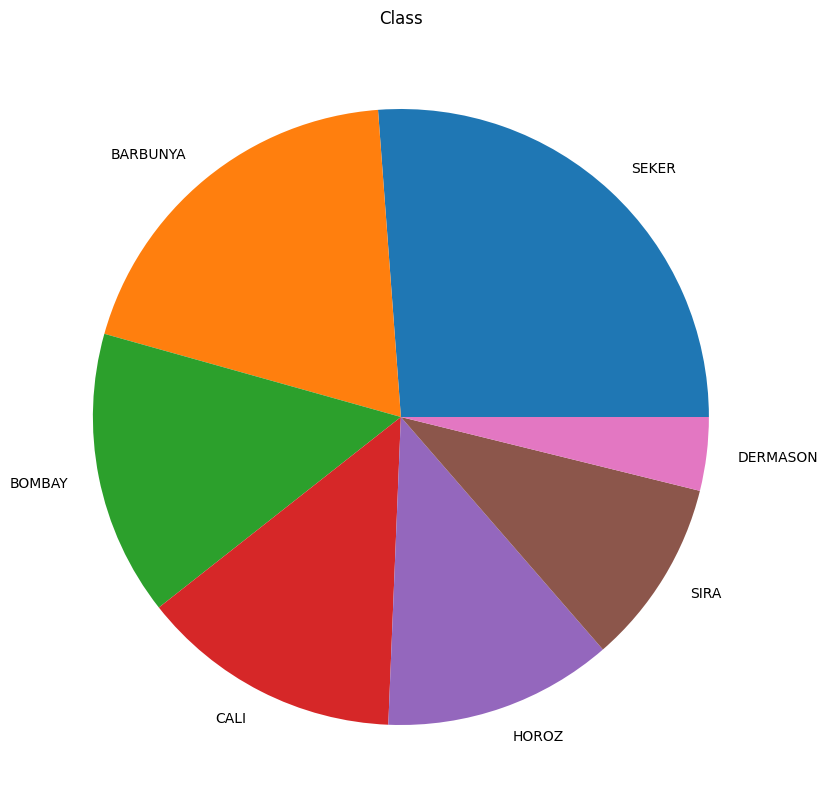

In [155]:
plt.figure(figsize=(20, 10))
plt.title('Class')
plt.pie(df.Class.value_counts(), labels=df.Class.unique())
plt.show()

Overall:
- Data has 13611 rows and 17 columns.
- No NULL values.
- We have 7 different classes of beans, and they are not balance.

In [156]:
df.Class.value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

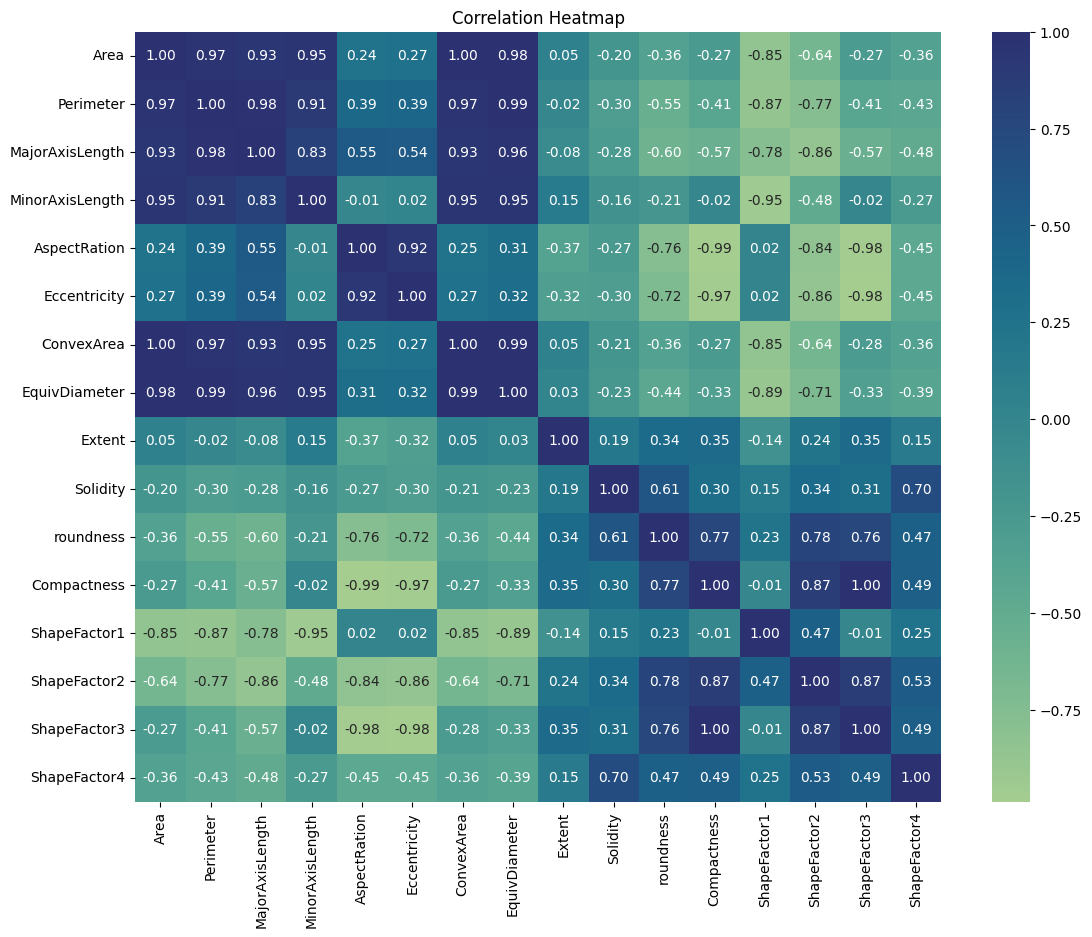

In [157]:
plt.figure(figsize=(13,10))
heatmap = sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='crest')
heatmap.set_title('Correlation Heatmap')

- **Area:** Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter
- **Perimeter:** Area, MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter
- **MajorAxisLength:** Area, Perimeter, MinorAxisLength, ConvexArea, EquivDiameter
- **MinorAxisLength:** Area, Perimeter, MajorAxisLength, ConvexArea, EquivDiameter
- **ConvexArea:** Area, Perimeter, MajorAxisLength, MinorAxisLength, EquivDiameter
- **EquivDiameter:** Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'MajorAxisLength'}>,
        <Axes: title={'center': 'MinorAxisLength'}>],
       [<Axes: title={'center': 'AspectRation'}>,
        <Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'ConvexArea'}>,
        <Axes: title={'center': 'EquivDiameter'}>],
       [<Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'roundness'}>,
        <Axes: title={'center': 'Compactness'}>],
       [<Axes: title={'center': 'ShapeFactor1'}>,
        <Axes: title={'center': 'ShapeFactor2'}>,
        <Axes: title={'center': 'ShapeFactor3'}>,
        <Axes: title={'center': 'ShapeFactor4'}>]], dtype=object)

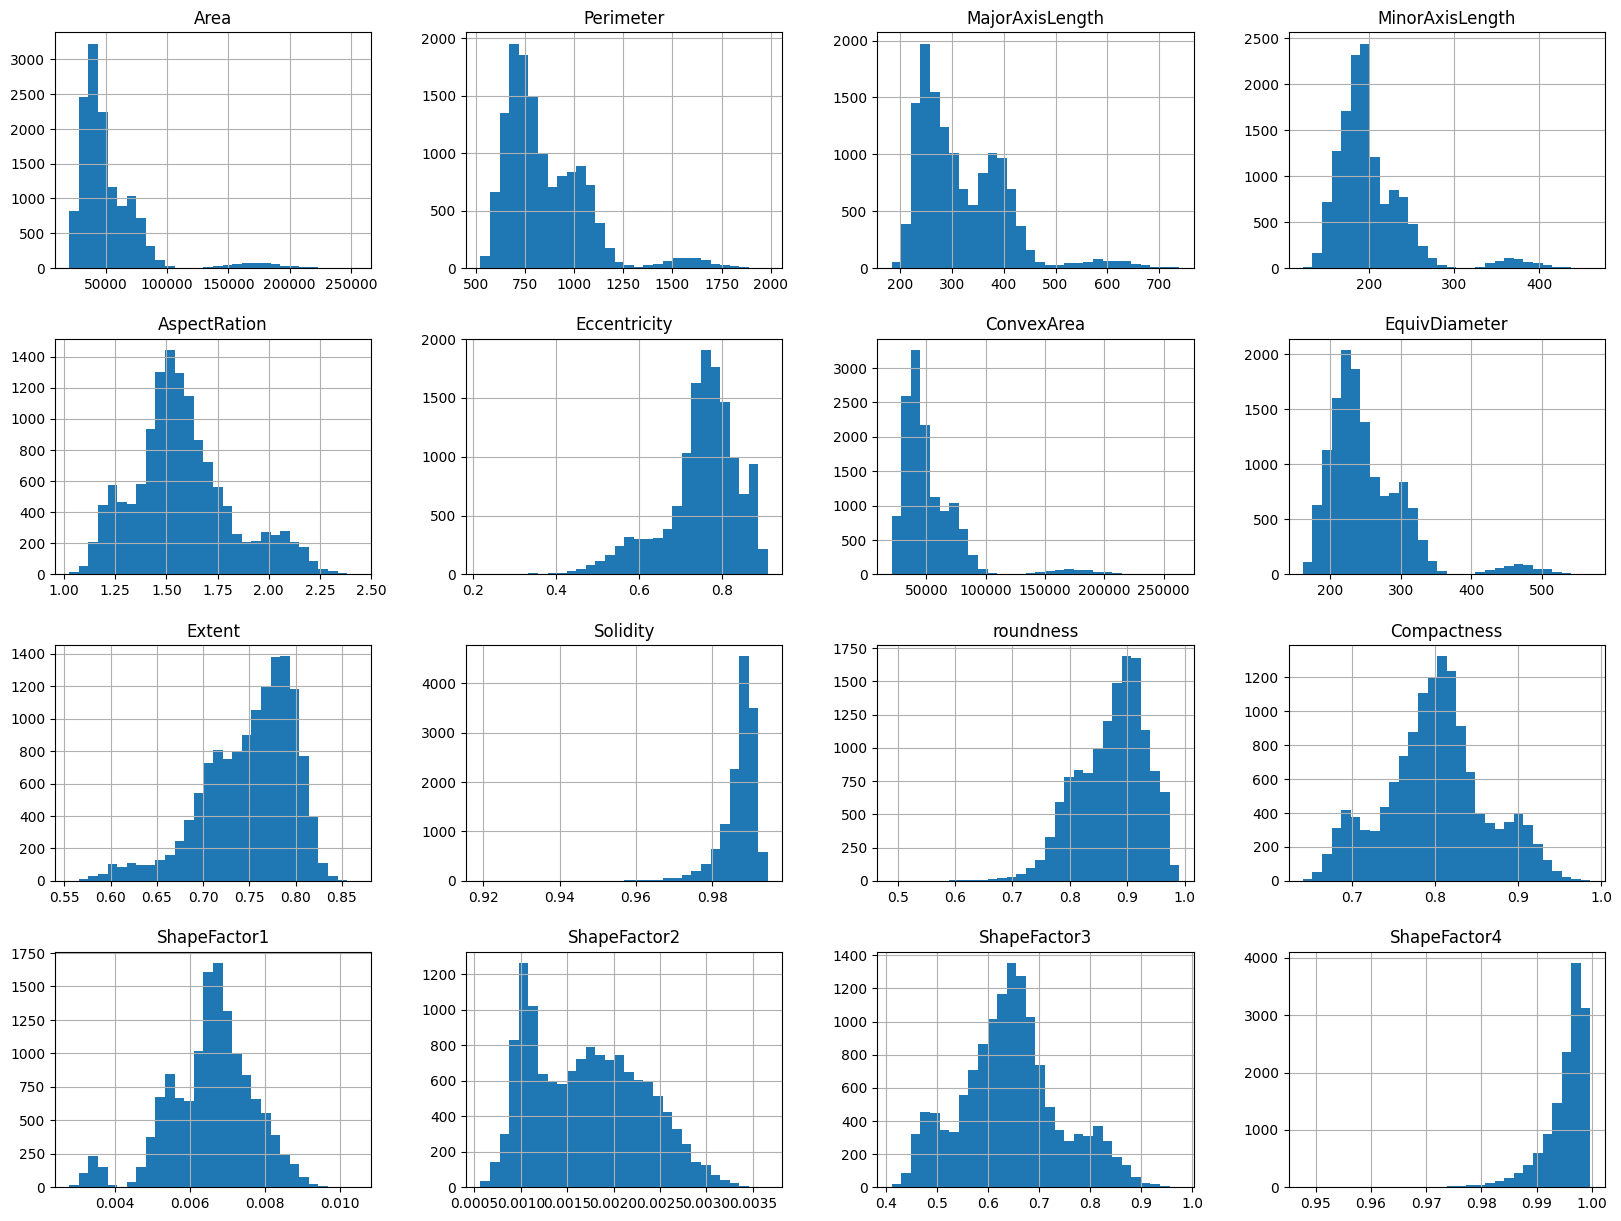

In [158]:
df.hist(bins=30, figsize=(20,15))

In [159]:
X = df.iloc[:,:-1].values  # take all columns and rows, except 'Class'
y = df.iloc[:, -1].values # take all rows from 'Class'

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0) 

In [161]:
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

In [165]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state=0, max_iter=1000)
regressor.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [170]:
y_pred = regressor.predict(X_test)
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.89      0.91       322
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.93      0.95      0.94       431
    DERMASON       0.92      0.93      0.93       915
       HOROZ       0.95      0.94      0.95       464
       SEKER       0.93      0.95      0.94       474
        SIRA       0.86      0.87      0.86       663

    accuracy                           0.92      3386
   macro avg       0.93      0.93      0.93      3386
weighted avg       0.92      0.92      0.92      3386



In [176]:
from sklearn.neighbors import KNeighborsClassifier
k_classifier = KNeighborsClassifier(n_neighbors=5)
k_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [177]:
y_pred = k_classifier.predict(X_test)
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       322
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.93      0.96      0.95       431
    DERMASON       0.91      0.92      0.91       915
       HOROZ       0.95      0.95      0.95       464
       SEKER       0.94      0.95      0.94       474
        SIRA       0.86      0.86      0.86       663

    accuracy                           0.92      3386
   macro avg       0.94      0.93      0.93      3386
weighted avg       0.92      0.92      0.92      3386

